In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('charity_navigator_clean.csv', index_col = 0)

Create a dataframe with no null values.

In [4]:
df2 = df[df['comp_leader_income'].isnull() == False]
org_type_dummies = pd.get_dummies(df2.org_type)
df2 = pd.concat([df2, org_type_dummies], axis = 1, join = 'outer')
df2.drop(['charity_name', 'charity_url', 
          'city', 'cn_advisory', 
          'state', 'org_type',
          'org_category', 'comp_leader_title'], 
         axis = 1, inplace = True)
df2.head()

,accountability_score,administrative_expenses,comp_leader_income,comp_leader_expense_pct,excess_or_deficit_for_year,financial_score,fundraising_expenses,net_assets,other_revenue,overall_score,...,"Arts, Culture, Humanities",Community Development,Education,Environment,Health,Human Services,Human and Civil Rights,International,Religion,Research and Public Policy
0,89.0,164590.0,53463.0,3.11,349718.0,90.56,111522,1350382,49634.0,89.75,...,0,0,0,0,0,0,1,0,0,0
1,86.0,1001560.0,73500.0,1.47,1175965.0,85.92,54613,14773920,382540.0,85.95,...,0,0,1,0,0,0,0,0,0,0
2,85.0,93957.0,85000.0,0.99,-461502.0,77.65,248833,-770370,0.0,80.96,...,0,0,0,0,0,0,0,1,0,0
3,86.0,346867.0,61220.0,0.78,1872733.0,97.50,384550,11460087,-81726.0,89.94,...,0,0,1,0,0,0,0,0,0,0
4,97.0,135195.0,74244.0,5.41,-103940.0,87.08,87436,723772,32436.0,90.62,...,0,0,0,0,0,0,0,0,1,0


## **Linear Regression**

Will simple linear regression allow for an accurate model to predict compensation leader income?

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [6]:
feature_names = ['accountability_score', 'financial_score',
                 'overall_score', 'administrative_expenses',
                 'excess_or_deficit_for_year', 'fundraising_expenses',
                 'net_assets', 'other_revenue',
                 'payments_to_affiliates', 'Animals',
                 'Arts, Culture, Humanities', 'Community Development',
                 'Education', 'Environment',
                 'Health', 'Human Services',
                 'Human and Civil Rights', 'International',
                 'Religion', 'Research and Public Policy']
X = df2[feature_names]
y = df2['comp_leader_income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 101)

First use a standard scaler to level all features in the model.

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
df_scaled_features = pd.DataFrame(X_train_scaled, columns = X.columns)
df_scaled_features2 = pd.DataFrame(X_test_scaled, columns = X.columns)
df_scaled_features = pd.concat([df_scaled_features, df_scaled_features2], axis=1, join = 'outer')
df_scaled_features.head()

,accountability_score,financial_score,overall_score,administrative_expenses,excess_or_deficit_for_year,fundraising_expenses,net_assets,other_revenue,payments_to_affiliates,Animals,...,"Arts, Culture, Humanities",Community Development,Education,Environment,Health,Human Services,Human and Civil Rights,International,Religion,Research and Public Policy
0,0.523977,0.794084,0.977527,1.416871,0.934873,0.885268,0.290553,-0.089992,-0.075257,-0.243064,...,-0.413244,-0.325487,-0.283784,-0.235588,-0.336121,1.560762,-0.207767,-0.268927,-0.237206,-0.145763
1,0.971347,0.136413,0.490523,-0.150319,-0.210251,0.024736,-0.116007,-0.299356,-0.075257,-0.243064,...,2.419876,-0.325487,-0.283784,-0.235588,-0.336121,-0.640713,-0.207767,-0.268927,-0.237206,-0.145763
2,0.971347,-0.355110,0.046528,-0.101158,-0.043167,-0.106470,-0.118849,-0.136323,-0.075257,4.114150,...,2.419876,-0.325487,-0.283784,-0.235588,-0.336121,-0.640713,-0.207767,-0.268927,-0.237206,-0.145763
3,-3.166823,-2.782065,-3.394119,-0.120767,-0.111231,-0.074416,-0.147770,-0.153193,-0.075257,-0.243064,...,-0.413244,-0.325487,-0.283784,-0.235588,2.975122,-0.640713,-0.207767,-0.268927,-0.237206,-0.145763
4,0.188450,0.008835,0.227415,0.377612,-0.450363,0.032822,0.547113,0.209070,-0.075257,-0.243064,...,2.419876,-0.325487,-0.283784,-0.235588,-0.336121,-0.640713,-0.207767,-0.268927,-0.237206,-0.145763


Then, instantiate LinearRegression() to create a new model.

In [10]:
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)
y_pred = linreg.predict(X_test_scaled).round().astype(int)

Is there a linear relationship between our test values and our predicted values?

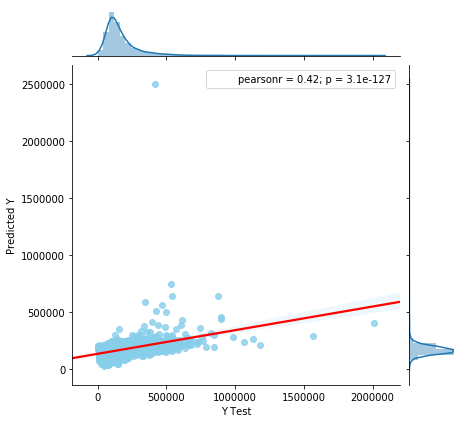

In [11]:
ax = sns.jointplot(x = y_test, y = y_pred, 
                   kind = 'reg', size = 6, ratio = 6, 
                   joint_kws={'color': 'skyblue'});
ax.set_axis_labels('Y Test', 'Predicted Y')
regline = ax.ax_joint.get_lines()[0]
regline.set_color('red')

What is the distribution of our prediction errors?

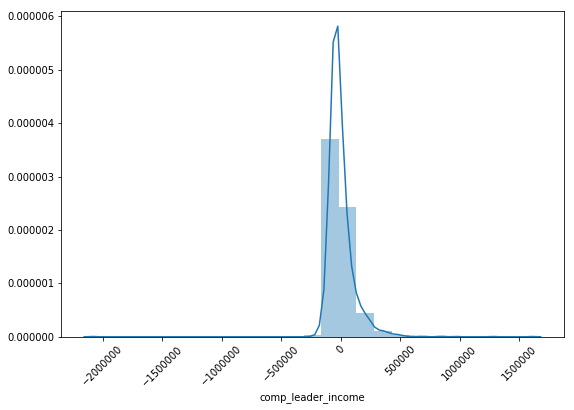

In [12]:
plt.figure(figsize = (9, 5))
ax = sns.distplot((y_test - y_pred), bins = 25)
ax.xaxis.set_tick_params(which = 'both', rotation = 45)

In [13]:
print('Simple Linear Regression Coefficients\nPolynomial Degree 1\nAlpha = 0')
cdf = pd.DataFrame(linreg.coef_.round(4), X.columns, columns = ['Coefficient'])
print('Intercept:', linreg.intercept_.round(4))
print('total non-zero coefficients: {}\n'.format(len(linreg.coef_.round(4))))
print(cdf)

Simple Linear Regression Coefficients
Polynomial Degree 1
Alpha = 0
Intercept: 165355.8902
total non-zero coefficients: 20

                             Coefficient
accountability_score        1.623731e+04
financial_score             6.258948e+03
overall_score              -8.354225e+02
administrative_expenses     3.385637e+04
excess_or_deficit_for_year  7.084418e+03
fundraising_expenses        4.260454e+03
net_assets                  1.065589e+03
other_revenue               1.695243e+04
payments_to_affiliates      1.301773e+04
Animals                     1.069318e+17
Arts, Culture, Humanities   1.644563e+17
Community Development       1.371251e+17
Education                   1.223674e+17
Environment                 1.039945e+17
Health                      1.407099e+17
Human Services              2.116420e+17
Human and Civil Rights      9.279797e+16
International               1.168489e+17
Religion                    1.046327e+17
Research and Public Policy  6.650151e+16


In [14]:
print('Train R^2:', linreg.score(X_train_scaled, y_train).round(4))
print('Test  R^2:', linreg.score(X_test_scaled, y_test).round(4))
print('MAE:      ', metrics.mean_absolute_error(y_test, y_pred).round(4))
print('MSE:      ', metrics.mean_squared_error(y_test, y_pred).round(4))
print('RMSE:     ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)).round(4))

Train R^2: 0.2478
Test  R^2: 0.175
MAE:       71917.2075
MSE:       13494225760.5737
RMSE:      116164.6494


In [15]:
from sklearn.preprocessing import PolynomialFeatures

In [16]:
n = [1, 2, 3]
i = 0
for n in n:
    poly = PolynomialFeatures(degree = n)
    X_poly_train = poly.fit_transform(X_train_scaled)
    linreg = linreg.fit(X_poly_train, y_train)
    y_pred = linreg.predict(poly.fit_transform(X_test_scaled))
#     print('simple linreg poly deg {} | coeff (w):\n{}'.format(n, linreg.coef_.round(4)))
#     print('simple linreg poly deg {} |  intercept (b): {:.3f}'.format(n, linreg.intercept_.round(4)))
    print('simple linreg poly deg {} | r^2 train: {:.4f}'.format(n, linreg.score(X_poly_train, y_train).round(4)))
    print('simple linreg poly deg {} | r^2  test: {:.4f}'.format(n, linreg.score(poly.fit_transform(X_test_scaled), y_test).round(4)))
    i+=1

simple linreg poly deg 1 | r^2 train: 0.2478
simple linreg poly deg 1 | r^2  test: 0.1754
simple linreg poly deg 2 | r^2 train: 0.5936
simple linreg poly deg 2 | r^2  test: -21.3741
simple linreg poly deg 3 | r^2 train: 0.7927
simple linreg poly deg 3 | r^2  test: -1927.0639


## **Ridge Regression**

In [17]:
from sklearn.linear_model import Ridge

In [18]:
print('Ridge regression: effect of alpha regularization parameter\ with polynomial degree 1\n')
r2_train_dic = {}
r2_test_dic = {}
for this_alpha in [0, 1, 10, 20, 50, 100, 200, 
                   250, 500, 750, 1000, 1050, 
                   1100, 1200, 1300, 1400, 2000]:
    linridge = Ridge(alpha = this_alpha)
    linridge.fit(X_train_scaled, y_train)
    r2_train = linridge.score(X_train_scaled, y_train)
    r2_train_dic[this_alpha] = linridge.score(X_train_scaled, y_train)
    r2_test = linridge.score(X_test_scaled, y_test)
    r2_test_dic[this_alpha] = linridge.score(X_test_scaled, y_test)
    num_coeff = 0
    n = 0
    for coefficient in linridge.coef_:
        if abs(linridge.coef_[n]) > 1.0:
            num_coeff+=1
            n+=1
        else:
            n+=1
    print('alpha = {}\nnum abs(coeff) > 1.0: {}, \
    train r^2: {:.4f}, test r^2: {:.4f}\n'
         .format(this_alpha, num_coeff, r2_train, r2_test))

Ridge regression: effect of alpha regularization parameter\ with polynomial degree 1

alpha = 0
num abs(coeff) > 1.0: 20,     train r^2: 0.2478, test r^2: 0.1754

alpha = 1
num abs(coeff) > 1.0: 20,     train r^2: 0.2478, test r^2: 0.1755

alpha = 10
num abs(coeff) > 1.0: 20,     train r^2: 0.2478, test r^2: 0.1761

alpha = 20
num abs(coeff) > 1.0: 20,     train r^2: 0.2478, test r^2: 0.1766

alpha = 50
num abs(coeff) > 1.0: 20,     train r^2: 0.2478, test r^2: 0.1783

alpha = 100
num abs(coeff) > 1.0: 20,     train r^2: 0.2477, test r^2: 0.1807

alpha = 200
num abs(coeff) > 1.0: 20,     train r^2: 0.2474, test r^2: 0.1844

alpha = 250
num abs(coeff) > 1.0: 20,     train r^2: 0.2472, test r^2: 0.1858

alpha = 500
num abs(coeff) > 1.0: 20,     train r^2: 0.2461, test r^2: 0.1906

alpha = 750
num abs(coeff) > 1.0: 20,     train r^2: 0.2448, test r^2: 0.1928

alpha = 1000
num abs(coeff) > 1.0: 20,     train r^2: 0.2434, test r^2: 0.1937

alpha = 1050
num abs(coeff) > 1.0: 20,     train r^

With a ridge regression of polynomial degree 1, how does our choice of alpha effect training and testing R^2 values?

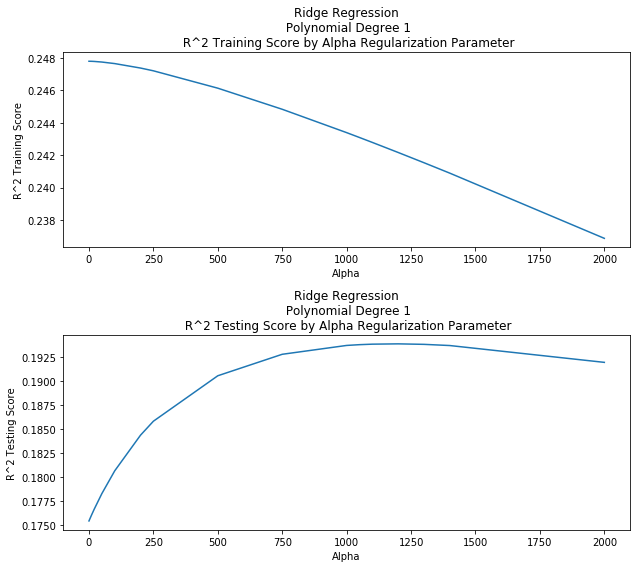

In [19]:
fig, axes = plt.subplots(nrows = 2, ncols = 1,
                         figsize = (9, 8))
axes[0].plot(r2_train_dic.keys(), r2_train_dic.values())
axes[0].set_xlabel('Alpha')
axes[0].set_ylabel('R^2 Training Score')
axes[0].set_title('Ridge Regression, Polynomial Degree 1\n \
R^2 Training Score by Alpha Regularization Parameter')
axes[1].plot(r2_test_dic.keys(), r2_test_dic.values())
axes[1].set_xlabel('Alpha')
axes[1].set_ylabel('R^2 Testing Score')
axes[1].set_title('Ridge Regression, Polynomial Degree 1\n \
R^2 Testing Score by Alpha Regularization Parameter')

plt.tight_layout()

In [20]:
linridge = Ridge(alpha = 1100)
linridge.fit(X_train_scaled, y_train)
y_pred = linridge.predict(X_test_scaled)

Is there a linear relationship between our test values and our predicted values?

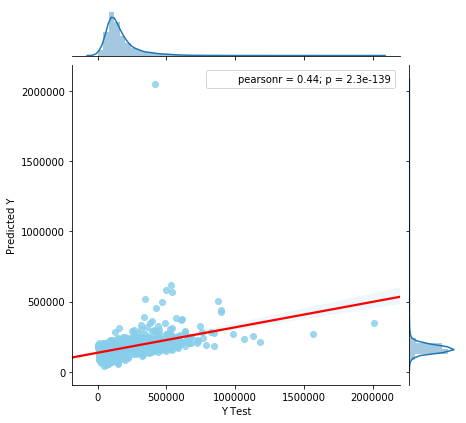

In [21]:
ax = sns.jointplot(x = y_test, y = y_pred, 
                   kind = 'reg', size = 6, ratio = 6, 
                   joint_kws={'color': 'skyblue'});
ax.set_axis_labels('Y Test', 'Predicted Y')
regline = ax.ax_joint.get_lines()[0]
regline.set_color('red')

What is the distribution of our prediction errors?

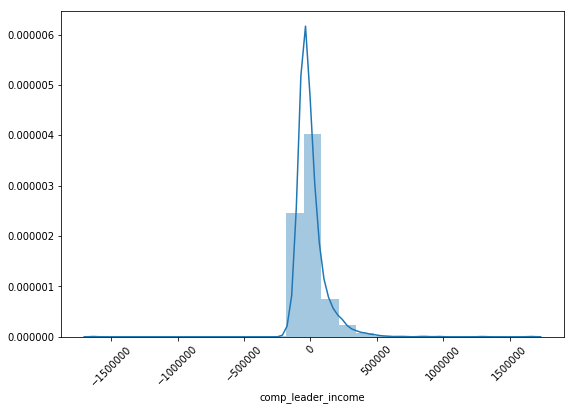

In [22]:
plt.figure(figsize = (9, 5))
ax = sns.distplot((y_test - y_pred), bins = 25)
ax.xaxis.set_tick_params(which = 'both', rotation = 45)

In [23]:
print('Ridge Regression Coefficients\nPolynomial Degree 1\nAlpha = 1100')
cdf = pd.DataFrame(linridge.coef_.round(4), X.columns, columns = ['Coefficient'])
print('Intercept:', linridge.intercept_.round(4))
print('total non-zero coefficients: {}\n'.format(len(linridge.coef_.round(4))))
print(cdf)

Ridge Regression Coefficients
Polynomial Degree 1
Alpha = 1100
Intercept: 165361.4236
total non-zero coefficients: 20

                            Coefficient
accountability_score         10121.4808
financial_score                987.7402
overall_score                 5784.7226
administrative_expenses      23173.9055
excess_or_deficit_for_year    6529.3449
fundraising_expenses          7135.2141
net_assets                    8741.7675
other_revenue                14017.9927
payments_to_affiliates       10772.6394
Animals                      -1472.4958
Arts, Culture, Humanities    11538.6587
Community Development        -3560.6335
Education                     3896.5063
Environment                  -1722.1607
Health                        4373.3001
Human Services              -10044.0676
Human and Civil Rights        1407.8409
International                  480.2411
Religion                     -7123.0913
Research and Public Policy    7809.1653


In [24]:
print('Train R^2:', linridge.score(X_train_scaled, y_train).round(4))
print('Test  R^2:', linridge.score(X_test_scaled, y_test).round(4))
print('MAE:      ', metrics.mean_absolute_error(y_test, y_pred).round(4))
print('MSE:      ', metrics.mean_squared_error(y_test, y_pred).round(4))
print('RMSE:     ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)).round(4))

Train R^2: 0.2428
Test  R^2: 0.1939
MAE:       72376.2684
MSE:       13185212438.7425
RMSE:      114826.8803


In [25]:
n = [1, 2, 3]
i = 0
for n in n:
    poly = PolynomialFeatures(degree = n)
    X_poly_train = poly.fit_transform(X_train_scaled)
    linridge = Ridge(alpha = 1100)
    linridge.fit(X_poly_train, y_train)
    y_pred = linridge.predict(poly.fit_transform(X_test_scaled))
#     print('ridge regression poly deg {} | coeff (w):\n{}'.format(n, linridge.coef_.round(4)))
#     print('ridge regression poly deg {} |  intercept (b): {:.3f}'.format(n, linridge.intercept_.round(4)))
    print('ridge regression poly deg {} | r^2 train: {:.4f}'.format(n, linridge.score(X_poly_train, y_train).round(4)))
    print('ridge regression poly deg {} | r^2  test: {:.4f}'.format(n, linridge.score(poly.fit_transform(X_test_scaled), y_test).round(4)))
    i+=1

ridge regression poly deg 1 | r^2 train: 0.2428
ridge regression poly deg 1 | r^2  test: 0.1939
ridge regression poly deg 2 | r^2 train: 0.4551
ridge regression poly deg 2 | r^2  test: 0.2157
ridge regression poly deg 3 | r^2 train: 0.6236
ridge regression poly deg 3 | r^2  test: -814.9419


In [26]:
print('Ridge regression: effect of alpha regularization parameter with polynomial degree 2\n')
r2_train_dic = {}
r2_test_dic = {}
for this_alpha in [0, 1, 10, 20, 50, 100, 200, 250, 500, 
                   750, 1000, 1050, 1100, 1200, 1300, 1400,
                   1900, 1950, 1955, 1956, 1957, 1958, 1959, 
                   1960, 1965, 1975, 2000]:
    poly = PolynomialFeatures(degree = 2)
    X_poly_train = poly.fit_transform(X_train_scaled)
    linridge = Ridge(alpha = this_alpha)
    linridge.fit(X_poly_train, y_train)
    r2_train = linridge.score(X_poly_train, y_train).round(4)
    r2_train_dic[this_alpha] = linridge.score(X_poly_train, y_train).round(4)
    r2_test = linridge.score(poly.fit_transform(X_test_scaled), y_test).round(4)
    r2_test_dic[this_alpha] = linridge.score(poly.fit_transform(X_test_scaled), y_test).round(4)
    num_coeff = 0
    n = 0
    for coefficient in linridge.coef_:
        if abs(linridge.coef_[n]) > 1.0:
            num_coeff+=1
            n+=1
        else:
            n+=1
    print('alpha = {}\nnum abs(coeff) > 1.0: {}, \
    train r^2: {:.4f}, test r^2: {:.4f}\n'
         .format(this_alpha, num_coeff, r2_train, r2_test))

Ridge regression: effect of alpha regularization parameter with polynomial degree 2

alpha = 0
num abs(coeff) > 1.0: 231,     train r^2: 0.5904, test r^2: -22.4861

alpha = 1
num abs(coeff) > 1.0: 230,     train r^2: 0.5922, test r^2: -29.7434

alpha = 10
num abs(coeff) > 1.0: 230,     train r^2: 0.5859, test r^2: -25.4788

alpha = 20
num abs(coeff) > 1.0: 230,     train r^2: 0.5815, test r^2: -17.9135

alpha = 50
num abs(coeff) > 1.0: 230,     train r^2: 0.5717, test r^2: -7.9238

alpha = 100
num abs(coeff) > 1.0: 230,     train r^2: 0.5591, test r^2: -3.3176

alpha = 200
num abs(coeff) > 1.0: 230,     train r^2: 0.5395, test r^2: -1.1937

alpha = 250
num abs(coeff) > 1.0: 230,     train r^2: 0.5313, test r^2: -0.8293

alpha = 500
num abs(coeff) > 1.0: 230,     train r^2: 0.5001, test r^2: -0.1581

alpha = 750
num abs(coeff) > 1.0: 230,     train r^2: 0.4781, test r^2: 0.0691

alpha = 1000
num abs(coeff) > 1.0: 230,     train r^2: 0.4610, test r^2: 0.1853

alpha = 1050
num abs(coeff) 

With a ridge regression of polynomial degree 2, how does our choice of alpha effect training and testing R^2 values?

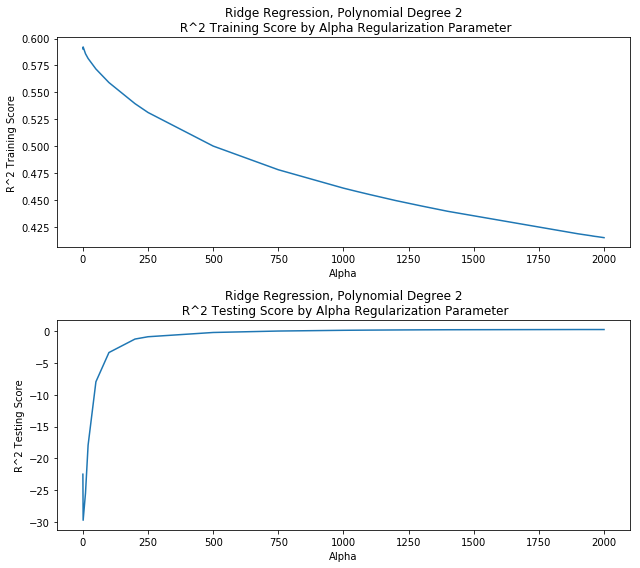

In [27]:
fig, axes = plt.subplots(nrows = 2, ncols = 1,
                         figsize = (9, 8))
axes[0].plot(r2_train_dic.keys(), r2_train_dic.values())
axes[0].set_xlabel('Alpha')
axes[0].set_ylabel('R^2 Training Score')
axes[0].set_title('Ridge Regression, Polynomial Degree 2\n \
R^2 Training Score by Alpha Regularization Parameter')
axes[1].plot(r2_test_dic.keys(), r2_test_dic.values())
axes[1].set_xlabel('Alpha')
axes[1].set_ylabel('R^2 Testing Score')
axes[1].set_title('Ridge Regression, Polynomial Degree 2\n \
R^2 Testing Score by Alpha Regularization Parameter')

plt.tight_layout()

In [28]:
poly = PolynomialFeatures(degree = 2)
X_poly_train = poly.fit_transform(X_train_scaled)
linridge = Ridge(alpha = 1960)
linridge.fit(X_poly_train, y_train)
y_pred = linridge.predict(poly.fit_transform(X_test_scaled))

Is there a linear relationship between our test values and our predicted values?

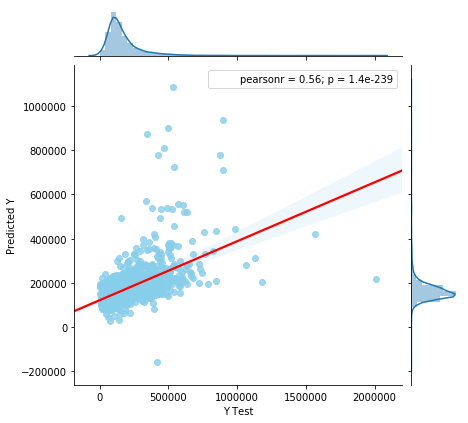

In [29]:
ax = sns.jointplot(x = y_test, y = y_pred, 
                   kind = 'reg', size = 6, ratio = 6, 
                   joint_kws={'color': 'skyblue'});
ax.set_axis_labels('Y Test', 'Predicted Y')
regline = ax.ax_joint.get_lines()[0]
regline.set_color('red')

What is the distribution of our prediction errors?

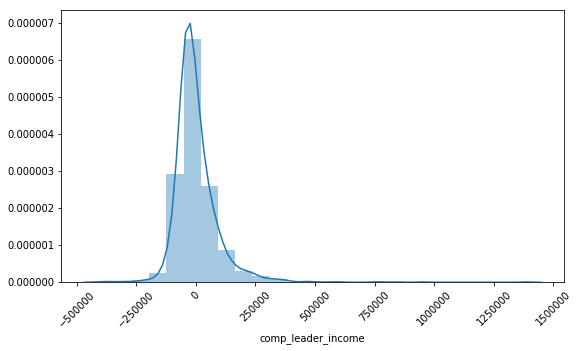

In [55]:
plt.figure(figsize = (9, 5))
ax = sns.distplot((y_test - y_pred), bins = 25)
ax.xaxis.set_tick_params(which = 'both', rotation = 45)

In [31]:
coeff_dic = {}
n = 0
for coef_ in linridge.coef_:
    if abs(linridge.coef_[n].round(4)) != 0:
        coeff_dic[poly.get_feature_names(feature_names)[n]] = linridge.coef_[n].round(4)
        n+=1
    else:
        n+=1

In [32]:
import json

In [33]:
print('Ridge Regression Coefficients\nPolynomial Degree 2\nAlpha = 1960')
print('Intercept:', linridge.intercept_.round(4))
print('total non-zero coefficients: {}\n'.format(len(coeff_dic)))
print(json.dumps(coeff_dic, indent = 1))

Ridge Regression Coefficients
Polynomial Degree 2
Alpha = 1960
Intercept: 157744.825
total non-zero coefficients: 230

{
 "accountability_score": 7825.3143,
 "financial_score": 1315.1673,
 "overall_score": 4768.8589,
 "administrative_expenses": 30019.6426,
 "excess_or_deficit_for_year": 4377.9743,
 "fundraising_expenses": 17957.739,
 "net_assets": 20314.4347,
 "other_revenue": 15547.4023,
 "payments_to_affiliates": 4291.3063,
 "Animals": 60.9388,
 "Arts, Culture, Humanities": 2663.2378,
 "Community Development": -202.1484,
 "Education": 555.883,
 "Environment": 29.8543,
 "Health": 968.7245,
 "Human Services": -2949.1145,
 "Human and Civil Rights": 148.3104,
 "International": 191.4792,
 "Religion": -489.6523,
 "Research and Public Policy": 226.0762,
 "accountability_score^2": -1189.8319,
 "accountability_score financial_score": -921.8483,
 "accountability_score overall_score": -829.7131,
 "accountability_score administrative_expenses": 2860.6172,
 "accountability_score excess_or_deficit

In [34]:
print('Train R^2:', linridge.score(X_poly_train, y_train).round(4))
print('Test  R^2:', linridge.score(poly.fit_transform(X_test_scaled), y_test).round(4))
print('MAE:      ', metrics.mean_absolute_error(y_test, y_pred).round(4))
print('MSE:      ', metrics.mean_squared_error(y_test, y_pred).round(4))
print('RMSE:     ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)).round(4))

Train R^2: 0.4164
Test  R^2: 0.3059
MAE:       68241.5026
MSE:       11353707799.7163
RMSE:      106553.7789


## **Lasso Regression**

In [35]:
from sklearn.linear_model import Lasso

In [36]:
print('Lasso regression: effect of alpha regularization parameter with polynomial degree 1\n')
r2_train_dic = {}
r2_test_dic = {}
for this_alpha in [0, 1, 10, 20, 50, 75, 100, 200, 250, 
                   500, 750, 1000, 2000, 3000, 4000, 5000]:
    linlasso = Lasso(alpha = this_alpha)
    linlasso.fit(X_train_scaled, y_train)
    r2_train = linlasso.score(X_train_scaled, y_train)
    r2_train_dic[this_alpha] = linlasso.score(X_train_scaled, y_train)
    r2_test = linlasso.score(X_test_scaled, y_test)
    r2_test_dic[this_alpha] = linlasso.score(X_test_scaled, y_test)
    num_coeff = 0
    n = 0   
    for coefficient in linlasso.coef_:
        if abs(linlasso.coef_[n]) > 1.0:
            num_coeff+=1
            n+=1
        else:
            n+=1
    print('alpha = {}\nnum abs(coeff) > 1.0: {}, \
    train r^2: {:.4f}, test r^2: {:.4f}\n'
         .format(this_alpha, num_coeff, r2_train, r2_test))

Lasso regression: effect of alpha regularization parameter with polynomial degree 1

alpha = 0
num abs(coeff) > 1.0: 20,     train r^2: 0.2478, test r^2: 0.1754

alpha = 1
num abs(coeff) > 1.0: 20,     train r^2: 0.2478, test r^2: 0.1754

alpha = 10
num abs(coeff) > 1.0: 20,     train r^2: 0.2478, test r^2: 0.1754

alpha = 20
num abs(coeff) > 1.0: 19,     train r^2: 0.2478, test r^2: 0.1754

alpha = 50
num abs(coeff) > 1.0: 18,     train r^2: 0.2478, test r^2: 0.1754

alpha = 75
num abs(coeff) > 1.0: 18,     train r^2: 0.2478, test r^2: 0.1754

alpha = 100
num abs(coeff) > 1.0: 18,     train r^2: 0.2478, test r^2: 0.1754

alpha = 200
num abs(coeff) > 1.0: 19,     train r^2: 0.2478, test r^2: 0.1752

alpha = 250
num abs(coeff) > 1.0: 19,     train r^2: 0.2477, test r^2: 0.1752

alpha = 500
num abs(coeff) > 1.0: 19,     train r^2: 0.2475, test r^2: 0.1748

alpha = 750
num abs(coeff) > 1.0: 18,     train r^2: 0.2472, test r^2: 0.1743

alpha = 1000
num abs(coeff) > 1.0: 18,     train r^2: 

With a lasso regression of polynomial degree 1, how does our choice of alpha effect training and testing R^2 values?

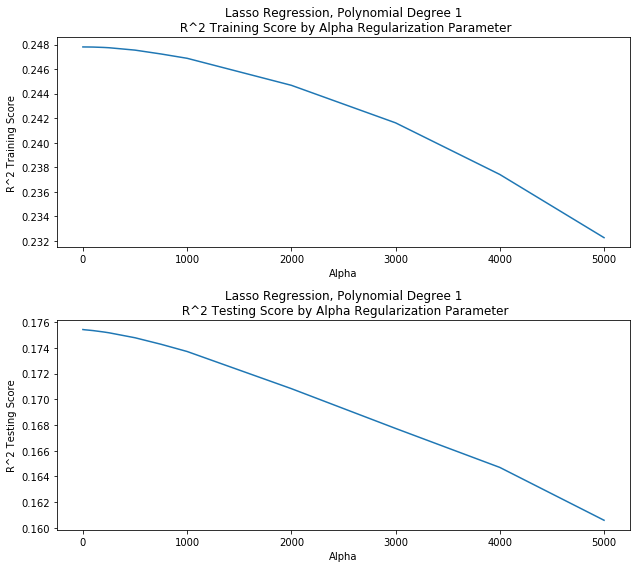

In [37]:
fig, axes = plt.subplots(nrows = 2, ncols = 1,
                         figsize = (9, 8))
axes[0].plot(r2_train_dic.keys(), r2_train_dic.values())
axes[0].set_xlabel('Alpha')
axes[0].set_ylabel('R^2 Training Score')
axes[0].set_title('Lasso Regression, Polynomial Degree 1\n \
R^2 Training Score by Alpha Regularization Parameter')
axes[1].plot(r2_test_dic.keys(), r2_test_dic.values())
axes[1].set_xlabel('Alpha')
axes[1].set_ylabel('R^2 Testing Score')
axes[1].set_title('Lasso Regression, Polynomial Degree 1\n \
R^2 Testing Score by Alpha Regularization Parameter')

plt.tight_layout()

In [38]:
n = [1, 2, 3, 4]
i = 0
for n in n:
    poly = PolynomialFeatures(degree = n)
    X_poly_train = poly.fit_transform(X_train_scaled)
    linlasso = Lasso(alpha = 1960)
    linlasso.fit(X_poly_train, y_train)
    y_pred = linlasso.predict(poly.fit_transform(X_test_scaled))
#     print('ridge regression poly deg {} | coeff (w):\n{}'.format(n, linlasso.coef_.round(4)))
#     print('ridge regression poly deg {} |  intercept (b): {:.3f}'.format(n, linlasso.intercept_.round(4)))
    print('ridge regression poly deg {} | r^2 train: {:.4f}'.format(n, linlasso.score(X_poly_train, y_train).round(4)))
    print('ridge regression poly deg {} | r^2  test: {:.4f}'.format(n, linlasso.score(poly.fit_transform(X_test_scaled), y_test).round(4)))
    i+=1

ridge regression poly deg 1 | r^2 train: 0.2448
ridge regression poly deg 1 | r^2  test: 0.1710
ridge regression poly deg 2 | r^2 train: 0.5067
ridge regression poly deg 2 | r^2  test: 0.2775
ridge regression poly deg 3 | r^2 train: 0.5813
ridge regression poly deg 3 | r^2  test: 0.3015
ridge regression poly deg 4 | r^2 train: 0.6467
ridge regression poly deg 4 | r^2  test: -228.6690


In [39]:
print('Lasso regression: effect of alpha regularization parameter with polynomial degree 2\n')
r2_train_dic = {}
r2_test_dic = {}
for this_alpha in [0, 1, 10, 20, 50, 100, 200, 250, 500, 750, 1000, 
                   1050, 1100, 1200, 1300, 1400, 1900, 1950, 2000, 
                   2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 
                   2900, 3000, 3100, 3200, 3210, 3120, 3230, 3240, 
                   3250, 3260, 3270, 3280, 3290, 3300, 3350, 3400, 
                   3500, 3600, 3700, 3800, 3900, 4000]:
    poly = PolynomialFeatures(degree = 2)
    X_poly_train = poly.fit_transform(X_train_scaled)
    linlasso = Lasso(alpha = this_alpha)
    linlasso.fit(X_poly_train, y_train)
    r2_train = linlasso.score(X_poly_train, y_train).round(4)
    r2_train_dic[this_alpha] = linlasso.score(X_poly_train, y_train).round(4)
    r2_test = linlasso.score(poly.fit_transform(X_test_scaled), y_test).round(4)
    r2_test_dic[this_alpha] = linlasso.score(poly.fit_transform(X_test_scaled), y_test).round(4)
    num_coeff = 0
    n = 0
    for coefficient in linlasso.coef_:
        if abs(linlasso.coef_[n]) > 1.0:
            num_coeff+=1
            n+=1
        else:
            n+=1
    print('alpha = {}\nnum abs(coeff) > 1.0: {}, \
    train r^2: {:.4f}, test r^2: {:.4f}\n'
         .format(this_alpha, num_coeff, r2_train, r2_test))

Lasso regression: effect of alpha regularization parameter with polynomial degree 2

alpha = 0
num abs(coeff) > 1.0: 230,     train r^2: 0.5855, test r^2: -0.4039

alpha = 1
num abs(coeff) > 1.0: 194,     train r^2: 0.5855, test r^2: -0.4017

alpha = 10
num abs(coeff) > 1.0: 164,     train r^2: 0.5851, test r^2: -0.3785

alpha = 20
num abs(coeff) > 1.0: 151,     train r^2: 0.5845, test r^2: -0.3712

alpha = 50
num abs(coeff) > 1.0: 139,     train r^2: 0.5827, test r^2: -0.3165

alpha = 100
num abs(coeff) > 1.0: 126,     train r^2: 0.5793, test r^2: -0.2879

alpha = 200
num abs(coeff) > 1.0: 121,     train r^2: 0.5716, test r^2: -0.2283

alpha = 250
num abs(coeff) > 1.0: 112,     train r^2: 0.5682, test r^2: -0.2757

alpha = 500
num abs(coeff) > 1.0: 90,     train r^2: 0.5552, test r^2: -0.1559

alpha = 750
num abs(coeff) > 1.0: 80,     train r^2: 0.5462, test r^2: 0.0079

alpha = 1000
num abs(coeff) > 1.0: 71,     train r^2: 0.5377, test r^2: 0.1213

alpha = 1050
num abs(coeff) > 1.0: 

With a lasso regression of polynomial degree 2, how does our choice of alpha effect training and testing R^2 values?

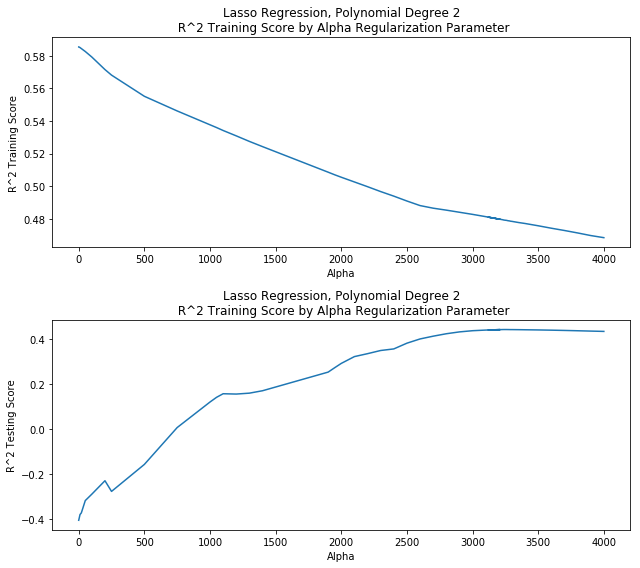

In [40]:
fig, axes = plt.subplots(nrows = 2, ncols = 1,
                         figsize = (9, 8))
axes[0].plot(r2_train_dic.keys(), r2_train_dic.values())
axes[0].set_xlabel('Alpha')
axes[0].set_ylabel('R^2 Training Score')
axes[0].set_title('Lasso Regression, Polynomial Degree 2\n \
R^2 Training Score by Alpha Regularization Parameter')
axes[1].plot(r2_test_dic.keys(), r2_test_dic.values())
axes[1].set_xlabel('Alpha')
axes[1].set_ylabel('R^2 Testing Score')
axes[1].set_title('Lasso Regression, Polynomial Degree 2\n \
R^2 Training Score by Alpha Regularization Parameter')

plt.tight_layout()

In [41]:
poly = PolynomialFeatures(degree = 2)
X_poly_train = poly.fit_transform(X_train_scaled)
linlasso = Lasso(alpha = 3240)
linlasso.fit(X_poly_train, y_train)
y_pred = linlasso.predict(poly.fit_transform(X_test_scaled))

Is there a linear relationship between our test values and our predicted values?

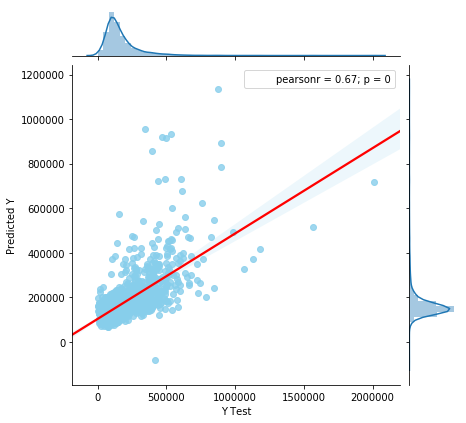

In [42]:
ax = sns.jointplot(x = y_test, y = y_pred, 
                   kind = 'reg', size = 6, ratio = 6, 
                   joint_kws={'color': 'skyblue'});
ax.set_axis_labels('Y Test', 'Predicted Y')
regline = ax.ax_joint.get_lines()[0]
regline.set_color('red')

What is the distribution of our prediction errors?

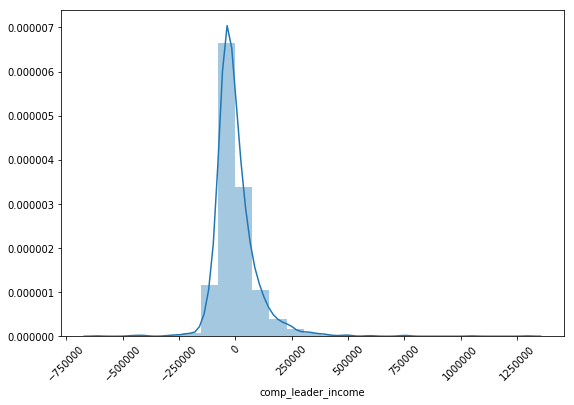

In [43]:
plt.figure(figsize = (9, 5))
ax = sns.distplot((y_test - y_pred), bins = 25)
ax.xaxis.set_tick_params(which = 'both', rotation = 45)

In [44]:
coeff_dic = {}
n = 0
for coef_ in linlasso.coef_:
    if abs(linlasso.coef_[n].round(4)) != 0:
        coeff_dic[poly.get_feature_names(feature_names)[n]] = linlasso.coef_[n].round(4)
        n+=1
    else:
        n+=1

In [45]:
print('Lasso Regression Coefficients\nPolynomial Degree 2\nAlpha = 3240')
print('Intercept:', linlasso.intercept_.round(4))
print('total non-zero coefficients: {}\n'.format(len(coeff_dic)))
print(json.dumps(coeff_dic, indent = 1))

Lasso Regression Coefficients
Polynomial Degree 2
Alpha = 3240
Intercept: 159384.202
total non-zero coefficients: 34

{
 "accountability_score": 5734.7489,
 "overall_score": 4043.1914,
 "administrative_expenses": 106495.0843,
 "fundraising_expenses": 37331.5353,
 "net_assets": 52384.0536,
 "Human Services": -1402.6108,
 "accountability_score Religion": -46.2892,
 "financial_score^2": -262.8574,
 "financial_score Arts, Culture, Humanities": 400.6122,
 "administrative_expenses^2": -2613.4857,
 "administrative_expenses excess_or_deficit_for_year": 2713.6101,
 "administrative_expenses fundraising_expenses": -1916.7147,
 "administrative_expenses net_assets": -1324.7394,
 "excess_or_deficit_for_year^2": 61.3399,
 "excess_or_deficit_for_year net_assets": -398.166,
 "excess_or_deficit_for_year other_revenue": -1405.507,
 "fundraising_expenses^2": -749.9348,
 "fundraising_expenses net_assets": -1111.222,
 "fundraising_expenses other_revenue": 765.653,
 "fundraising_expenses Health": 731.2099,
 

In [46]:
print('Train R^2:', linlasso.score(X_poly_train, y_train).round(4))
print('Test  R^2:', linlasso.score(poly.fit_transform(X_test_scaled), y_test).round(4))
print('MAE:      ', metrics.mean_absolute_error(y_test, y_pred).round(4))
print('MSE:      ', metrics.mean_squared_error(y_test, y_pred).round(4))
print('RMSE:     ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)).round(4))

Train R^2: 0.4792
Test  R^2: 0.4433
MAE:       61695.078
MSE:       9104749687.7809
RMSE:      95418.812


In [47]:
print('Lasso regression: effect of alpha regularization parameter with polynomial degree 3\n')
r2_train_dic = {}
r2_test_dic = {}
for this_alpha in [0, 1, 10, 20, 50, 100, 200, 250, 500, 750, 1000, 
                   1050, 1100, 1200, 1300, 1400, 1900, 1950, 2000, 
                   2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 
                   2900, 3000, 3100, 3200, 3300, 3400, 3450, 3460, 
                   3470, 3480, 3490, 3500, 3550, 3600, 3700, 3800, 
                   3900, 4000]:
    poly = PolynomialFeatures(degree = 3)
    X_poly_train = poly.fit_transform(X_train_scaled)
    linlasso = Lasso(alpha = this_alpha)
    linlasso.fit(X_poly_train, y_train)
    r2_train = linlasso.score(X_poly_train, y_train).round(4)
    r2_train_dic[this_alpha] = linlasso.score(X_poly_train, y_train).round(4)
    r2_test = linlasso.score(poly.fit_transform(X_test_scaled), y_test).round(4)
    r2_test_dic[this_alpha] = linlasso.score(poly.fit_transform(X_test_scaled), y_test).round(4)
    num_coeff = 0
    n = 0
    for coefficient in linlasso.coef_:
        if abs(linlasso.coef_[n]) > 1.0:
            num_coeff+=1
            n+=1
        else:
            n+=1
    print('alpha = {}\nnum abs(coeff) > 1.0: {}, \
    train r^2: {:.4f}, test r^2: {:.4f}\n'
         .format(this_alpha, num_coeff, r2_train, r2_test))

Lasso regression: effect of alpha regularization parameter with polynomial degree 3

alpha = 0
num abs(coeff) > 1.0: 1729,     train r^2: 0.7124, test r^2: -237.7981

alpha = 1
num abs(coeff) > 1.0: 1269,     train r^2: 0.7122, test r^2: -239.1172

alpha = 10
num abs(coeff) > 1.0: 831,     train r^2: 0.7094, test r^2: -200.5326

alpha = 20
num abs(coeff) > 1.0: 725,     train r^2: 0.7057, test r^2: -177.5447

alpha = 50
num abs(coeff) > 1.0: 615,     train r^2: 0.6979, test r^2: -138.8481

alpha = 100
num abs(coeff) > 1.0: 519,     train r^2: 0.6888, test r^2: -95.4825

alpha = 200
num abs(coeff) > 1.0: 419,     train r^2: 0.6741, test r^2: -61.6009

alpha = 250
num abs(coeff) > 1.0: 388,     train r^2: 0.6686, test r^2: -51.4857

alpha = 500
num abs(coeff) > 1.0: 301,     train r^2: 0.6450, test r^2: -20.6359

alpha = 750
num abs(coeff) > 1.0: 247,     train r^2: 0.6264, test r^2: -8.2272

alpha = 1000
num abs(coeff) > 1.0: 215,     train r^2: 0.6119, test r^2: -1.0821

alpha = 1050
n

With a lasso regression of polynomial degree 3, how does our choice of alpha effect training and testing R^2 values?

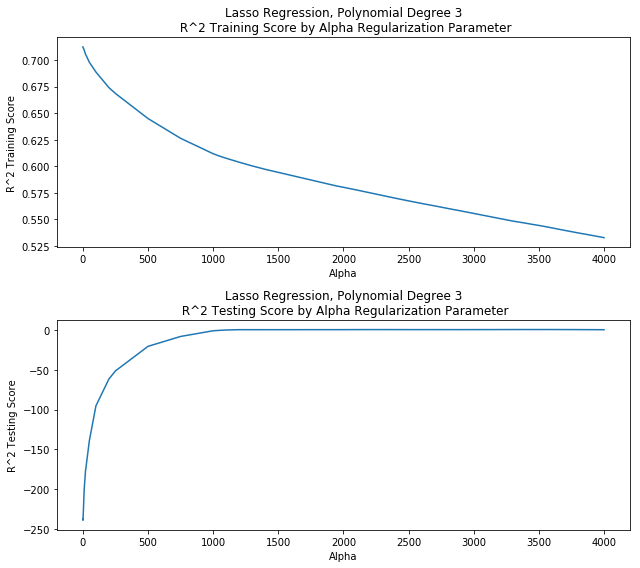

In [48]:
fig, axes = plt.subplots(nrows = 2, ncols = 1,
                         figsize = (9, 8))
axes[0].plot(r2_train_dic.keys(), r2_train_dic.values())
axes[0].set_xlabel('Alpha')
axes[0].set_ylabel('R^2 Training Score')
axes[0].set_title('Lasso Regression, Polynomial Degree 3\n \
R^2 Training Score by Alpha Regularization Parameter')
axes[1].plot(r2_test_dic.keys(), r2_test_dic.values())
axes[1].set_xlabel('Alpha')
axes[1].set_ylabel('R^2 Testing Score')
axes[1].set_title('Lasso Regression, Polynomial Degree 3\n \
R^2 Testing Score by Alpha Regularization Parameter')

plt.tight_layout()

In [49]:
poly = PolynomialFeatures(degree = 3)
X_poly_train = poly.fit_transform(X_train_scaled)
linlasso = Lasso(alpha = 3490)
linlasso.fit(X_poly_train, y_train)
y_pred = linlasso.predict(poly.fit_transform(X_test_scaled))

Is there a linear relationship between our test values and our predicted values?

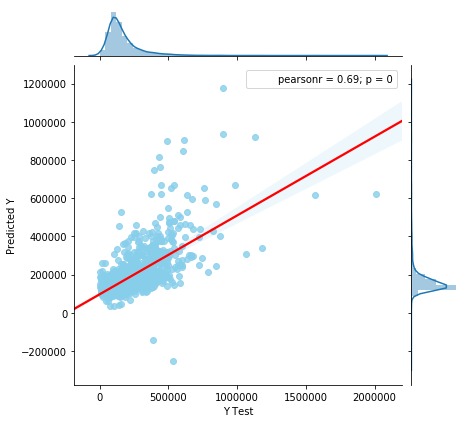

In [50]:
ax = sns.jointplot(x = y_test, y = y_pred, 
                   kind = 'reg', size = 6, ratio = 6, 
                   joint_kws={'color': 'skyblue'});
ax.set_axis_labels('Y Test', 'Predicted Y')
regline = ax.ax_joint.get_lines()[0]
regline.set_color('red')

What is the distribution of our prediction errors?

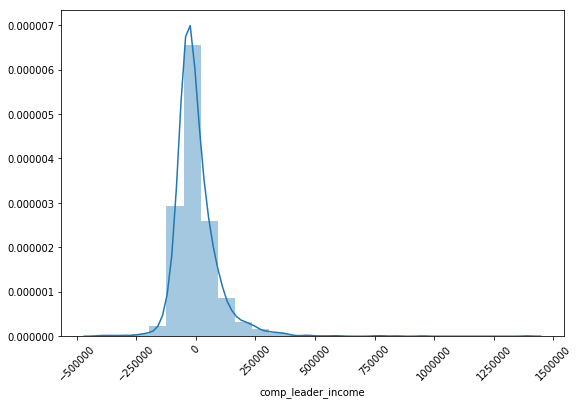

In [51]:
plt.figure(figsize = (9, 5))
ax = sns.distplot((y_test - y_pred), bins = 25)
ax.xaxis.set_tick_params(which = 'both', rotation = 45)

In [52]:
coeff_dic = {}
n = 0
for coef_ in linlasso.coef_:
    if abs(linlasso.coef_[n].round(4)) != 0:
        coeff_dic[poly.get_feature_names(feature_names)[n]] = linlasso.coef_[n].round(4)
        n+=1
    else:
        n+=1

In [53]:
print('Lasso Regression Coefficients\nPolynomial Degree 3\nAlpha = 3490')
print('Intercept:', linlasso.intercept_.round(4))
print('total non-zero coefficients: {}\n'.format(len(coeff_dic)))
print(json.dumps(coeff_dic, indent = 1))

Lasso Regression Coefficients
Polynomial Degree 3
Alpha = 3490
Intercept: 154074.3852
total non-zero coefficients: 122

{
 "administrative_expenses": 2344.327,
 "administrative_expenses^2": -9467.3007,
 "excess_or_deficit_for_year^2": 84.9675,
 "net_assets other_revenue": -2699.6167,
 "payments_to_affiliates^2": 147.1534,
 "accountability_score^3": 59.3089,
 "accountability_score^2 Health": 2004.0533,
 "accountability_score financial_score^2": 188.3887,
 "accountability_score net_assets^2": -330.3584,
 "accountability_score net_assets other_revenue": -133.2912,
 "accountability_score Animals^2": 533.8217,
 "accountability_score Environment^2": 270.2074,
 "accountability_score Health^2": 2840.5475,
 "accountability_score Human Services^2": 1217.8196,
 "accountability_score Human and Civil Rights^2": 570.0217,
 "accountability_score International^2": 309.7583,
 "accountability_score Religion^2": 4.8765,
 "accountability_score Research and Public Policy^2": -19.8167,
 "financial_score^3":

In [54]:
print('Train R^2:', linlasso.score(X_poly_train, y_train).round(4))
print('Test  R^2:', linlasso.score(poly.fit_transform(X_test_scaled), y_test).round(4))
print('MAE:      ', metrics.mean_absolute_error(y_test, y_pred).round(4))
print('MSE:      ', metrics.mean_squared_error(y_test, y_pred).round(4))
print('RMSE:     ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)).round(4))

Train R^2: 0.5446
Test  R^2: 0.4632
MAE:       60620.6667
MSE:       8780061413.8975
RMSE:      93701.9819
